# A Machine Learning Approach to Glycerin to Glycol Production Analysis
========================================================================================================

## ANOMALY DETECTION - SUPERVISED

In this section, we will develop models using supervised learning algorithms to detect anomalies in the process, identifying potential failures before they occur. These models will serve as the foundation for an early warning system, enabling proactive interventions to prevent disruptions. By leveraging data patterns and machine learning, we aim to enhance the reliability and efficiency of the process while minimizing downtime.

- Supervised Learning for Anomaly Detection
    - k-Nearest Neighbors (KNN)
    - Random Forest
    - Decision Trees
    - Logistic Regression
    - Naive Bayes
    - SVC
    - XGBoost
    - MLP
    - Stacked


## READING THE DATA

### Importing the libraries

Let us start by importing the necessary libraries.

In [64]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    auc,
    f1_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

### Loading the preprocessed data

We will load the preprocessed data from the 'GeneralAnalysis' notebook.

In [65]:
hydrogen_df = pd.read_pickle("data/hydrogen_df.pkl")
numerical_df = pd.read_pickle("data/numerical_df.pkl")
no_calc_df = pd.read_pickle("data/no_calc_df.pkl")

In [66]:
display(hydrogen_df.head())
display(numerical_df.head())
display(no_calc_df.head())

,Glycerine to Glycol Sample ID,Sample time,Liquid Feed \n(L/h),Pure H2 Gas Flow Setpoint on PLC\n(g/h),Recycled H2 Gas Flow (g/h),Total H2 Gas Flow (g/h),RX-203 Pressure (psig),T2 (Top)\n(°C),T3 \n(°C),T4\n(°C),...,Glycerol Feed Area (HPLC),Glycerol Feed Concentration (g/L),Glycerol Remaining Concentration (g/L),EG Concentration (g/L),PG Concentration (g/L),PG/EG Ratio,Conversion (%),EG Yield (%),PG Yield (%),Overall Glycol Yield (%)
1,20231015-C3-G1-RX203-001,2023-10-15 15:00:00,4.0,250.0,150.0,400,631.0,216.0,219.0,221.0,...,7670.7621,581.443767,378.229508,13.219690,208.391724,15.763738,0.349499,0.065053,1.025478,1.090531
3,20231015-C3-G1-RX203-003,2023-10-15 17:00:00,4.0,250.0,150.0,400,633.0,218.0,221.0,225.0,...,7670.7621,581.443767,376.341444,16.838202,264.832496,15.728075,0.352747,0.082097,1.291221,1.373318
5,20231015-C3-G1-RX203-005,2023-10-15 22:00:00,4.0,250.0,0.0,250,606.0,210.0,213.0,214.0,...,7670.7621,581.443767,169.054170,17.034776,323.029406,18.962938,0.709251,0.041307,0.783311,0.824619
6,20231015-C3-G1-RX203-006,2023-10-15 23:00:00,4.0,250.0,0.0,250,613.0,213.0,215.0,216.0,...,7670.7621,581.443767,173.375733,19.375754,335.963875,17.339397,0.701819,0.047482,0.823304,0.870785
7,20231015-C3-G1-RX203-007,2023-10-15 00:00:00,4.0,250.0,0.0,250,606.0,213.0,216.0,217.0,...,7670.7621,581.443767,138.497235,18.031212,303.250974,16.818114,0.761805,0.040707,0.684622,0.725329


,Liquid Feed \n(L/h),Pure H2 Gas Flow Setpoint on PLC\n(g/h),Recycled H2 Gas Flow (g/h),Total H2 Gas Flow (g/h),RX-203 Pressure (psig),T2 (Top)\n(°C),T3 \n(°C),T4\n(°C),T5 (Bottom)\n(°C),After HEX (°C),...,Glycerol Feed Area (HPLC),Glycerol Feed Concentration (g/L),Glycerol Remaining Concentration (g/L),EG Concentration (g/L),PG Concentration (g/L),PG/EG Ratio,Conversion (%),EG Yield (%),PG Yield (%),Overall Glycol Yield (%)
1,4.0,250.0,150.0,400,631.0,216.0,219.0,221.0,223.0,227.0,...,7670.7621,581.443767,378.229508,13.219690,208.391724,15.763738,0.349499,0.065053,1.025478,1.090531
3,4.0,250.0,150.0,400,633.0,218.0,221.0,225.0,223.0,228.0,...,7670.7621,581.443767,376.341444,16.838202,264.832496,15.728075,0.352747,0.082097,1.291221,1.373318
5,4.0,250.0,0.0,250,606.0,210.0,213.0,214.0,214.0,239.0,...,7670.7621,581.443767,169.054170,17.034776,323.029406,18.962938,0.709251,0.041307,0.783311,0.824619
6,4.0,250.0,0.0,250,613.0,213.0,215.0,216.0,217.0,239.0,...,7670.7621,581.443767,173.375733,19.375754,335.963875,17.339397,0.701819,0.047482,0.823304,0.870785
7,4.0,250.0,0.0,250,606.0,213.0,216.0,217.0,218.0,239.0,...,7670.7621,581.443767,138.497235,18.031212,303.250974,16.818114,0.761805,0.040707,0.684622,0.725329


,Liquid Feed \n(L/h),Pure H2 Gas Flow Setpoint on PLC\n(g/h),Recycled H2 Gas Flow (g/h),Total H2 Gas Flow (g/h),RX-203 Pressure (psig),T2 (Top)\n(°C),T3 \n(°C),T4\n(°C),T5 (Bottom)\n(°C),After HEX (°C),Average Temp.\n(°C),Feed \npH,Product \npH,Glycerol Area,EG Area,PG Area,Glycerol Feed Area (HPLC),Glycerol Feed Concentration (g/L)
1,4.0,250.0,150.0,400,631.0,216.0,219.0,221.0,223.0,227.0,219.75,11.30,3.56,4989.8352,133.1288,2472.0252,7670.7621,581.443767
3,4.0,250.0,150.0,400,633.0,218.0,221.0,225.0,223.0,228.0,221.75,11.30,3.95,4964.9267,169.5690,3141.5480,7670.7621,581.443767
5,4.0,250.0,0.0,250,606.0,210.0,213.0,214.0,214.0,239.0,212.75,11.15,4.43,2230.2661,171.5486,3831.9028,7670.7621,581.443767
6,4.0,250.0,0.0,250,613.0,213.0,215.0,216.0,217.0,239.0,215.25,11.10,4.43,2287.2788,195.1234,3985.3366,7670.7621,581.443767
7,4.0,250.0,0.0,250,606.0,213.0,216.0,217.0,218.0,239.0,216.00,11.10,4.26,1827.1403,181.5832,3597.2832,7670.7621,581.443767


In [67]:
print(f"hydrogen_df contains {hydrogen_df.shape[0]} rows and {hydrogen_df.shape[1]} columns")
print(f"numerical_df contains {numerical_df.shape[0]} rows and {numerical_df.shape[1]} columns")
print(f"no_calc_df contains {no_calc_df.shape[0]} rows and {no_calc_df.shape[1]} columns")

hydrogen_df contains 135 rows and 28 columns
numerical_df contains 135 rows and 26 columns
no_calc_df contains 135 rows and 18 columns


### Visualizing the Overall Glycol Yield

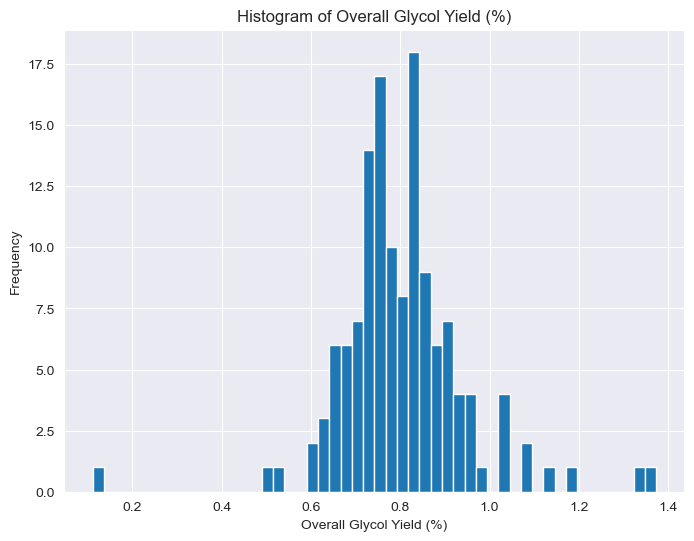

In [68]:
plt.figure(figsize=(8, 6))
plt.hist(hydrogen_df['Overall Glycol Yield (%)'], bins=50)
plt.title('Histogram of Overall Glycol Yield (%)')
plt.xlabel('Overall Glycol Yield (%)')
plt.ylabel('Frequency')
plt.show()

### Categorizing the data

Below, we will categorize the dataset based on the column 'Overall Glycol Yield (%)', classifying entries with yields above 80% as normal and those below 80% as anomalies. This categorization results in an approximately balanced dataset, with 71 entries identified as anomalies and 64 as normal. This balance ensures robust training and evaluation of anomaly detection models.

In [69]:
classification_df = no_calc_df.copy()
classification_df['Overall Glycol Yield (%)'] = hydrogen_df['Overall Glycol Yield (%)']

In [70]:
classification_df['Glycol Yield Category'] = hydrogen_df['Overall Glycol Yield (%)'].apply(
    lambda x: 'Anomaly' if x < 0.8 else 'Normal')

classification_df['Glycol Yield Category'].value_counts()

Glycol Yield Category
Anomaly    71
Normal     64
Name: count, dtype: int64

In [71]:
classification_df['Glycol Yield Category'].unique().tolist()

['Normal', 'Anomaly']

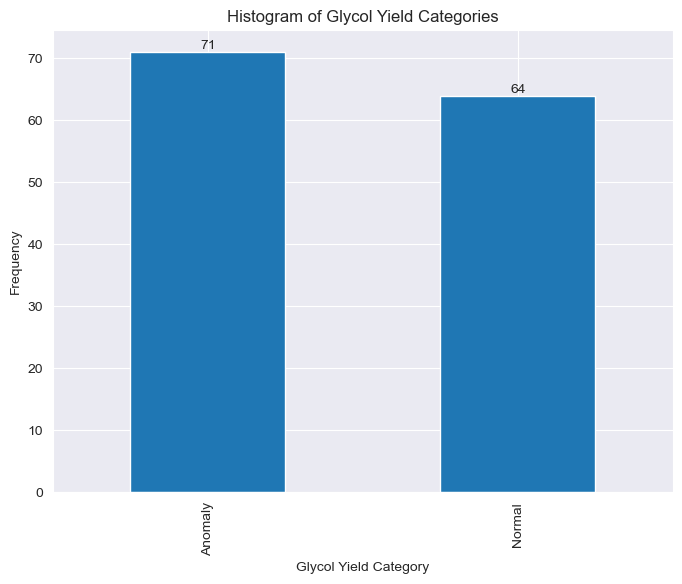

In [72]:
plt.figure(figsize=(8, 6))

ax = classification_df['Glycol Yield Category'].value_counts().sort_index().plot(kind='bar')

plt.title('Histogram of Glycol Yield Categories')
plt.xlabel('Glycol Yield Category')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

## CLASSIFICATION MODELLING

### Selecting features

We used the 'Glycol Yield Category' derived from the categorized 'Overall Glycol Yield (%)' as target variable. Before building the model, we carefully selected the features to ensure relevance and minimize redundancy. The following adjustments were made:

* Utilized the average temperature (Ave. Temp) instead of the individual temperature readings (T2, T3, T4, and T5) for simplicity and to reduce multicollinearity.
* Excluded output-related factors, such as glycerol area, EG area, and PG area, as these are closely tied to the target variable and could introduce redundancy.
* Removed the highly correlated feature glycerol feed area, as it strongly correlates with glycerol feed concentration.
* Excluded total H2 gas flow since it is a derived feature, representing the sum of pure H2 gas flow and recycled H2 gas flow.

In [73]:
uncontrolled_factors = [
    'T2 (Top)\n(°C)',
    'T3 \n(°C)',
    'T4\n(°C)',
    'T5 (Bottom)\n(°C)',
]

output_factors = [
    'Product \npH',
    'Glycerol Area',
    'EG Area',
    'PG Area',
]

highly_correlated_factors = [
    'Glycerol Feed Area (HPLC)',  # with Glycerol Feed Concentration (g/L)
    'Total H2 Gas Flow (g/h)',
]

factors_to_remove = uncontrolled_factors + output_factors + highly_correlated_factors

y = classification_df['Glycol Yield Category']
X = no_calc_df.drop(columns=factors_to_remove, axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=101)

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=101)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(108, 8) (27, 8) (108,) (27,)


### Logistic Regression

Best for: Linear relationships between features and the target |
Pros: Simple to implement, interpretable coefficients, works well with small datasets |
Cons: Assumes linearity, sensitive to multicollinearity and outliers

In [74]:
log_reg = LogisticRegression(random_state=101)

param_grid_log_reg = {
    'penalty': ['l2', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [200, 500, 1000, 2000]
}

grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

print("Best parameters found:", grid_search_log_reg.best_params_)
print("Best accuracy score for Logistic Regression:", grid_search_log_reg.best_score_)

Best parameters found: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2'}
Best accuracy score for Logistic Regression: 0.6991341991341992


In [75]:
best_model_log_reg = grid_search_log_reg.best_estimator_

test_accuracy_log_reg = best_model_log_reg.score(X_test, y_test)
print("Test set accuracy with best parameters:", test_accuracy_log_reg)

Test set accuracy with best parameters: 0.7777777777777778


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        18
           1       0.60      1.00      0.75         9

    accuracy                           0.78        27
   macro avg       0.80      0.83      0.77        27
weighted avg       0.87      0.78      0.78        27



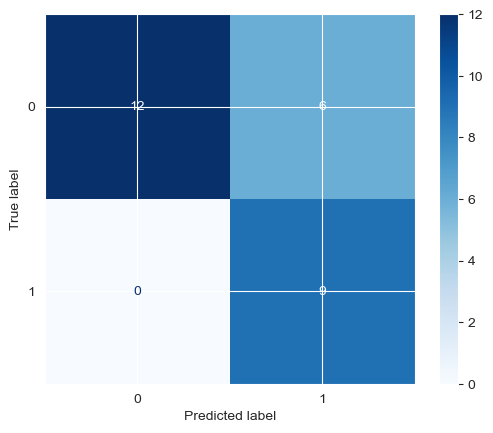

In [76]:
y_pred_log_reg = best_model_log_reg.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

Logistic Regression model performs well overall, with high recall for both classes (1.00 for Class 1 and 0.67 for Class 0). It balances precision and recall better than KNN, achieving a higher overall accuracy of 78%. While it misses some anomalies, it reliably identifies all normal cases, making it more balanced and effective than KNN for this task.

## kNN Classifier

Best for: Low-dimensional data or data with distinct clusters |
Pros: Easy to understand, non-parametric, no need for training |
Cons: Computationally expensive for large datasets, sensitive to noisy or irrelevant features

In [77]:
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print("Best parameters found:", grid_search_knn.best_params_)
print("Best accuracy score for KNN:", grid_search_knn.best_score_)

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best accuracy score for KNN: 0.7593073593073593


In [78]:
best_model_knn = grid_search_knn.best_estimator_

test_accuracy_knn = best_model_knn.score(X_test, y_test)
print("Test set accuracy with best parameters:", test_accuracy_knn)

Test set accuracy with best parameters: 0.5925925925925926


KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.39      0.56        18
           1       0.45      1.00      0.62         9

    accuracy                           0.59        27
   macro avg       0.72      0.69      0.59        27
weighted avg       0.82      0.59      0.58        27



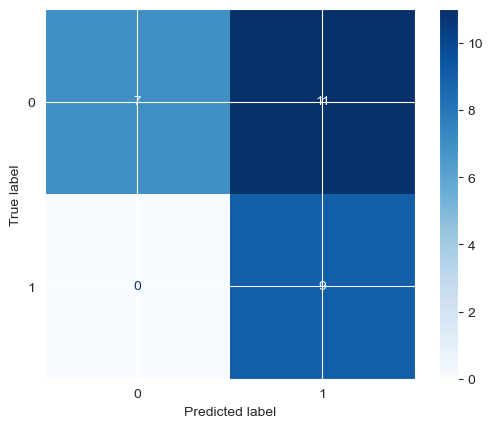

In [79]:
y_pred_knn = best_model_knn.predict(X_test)

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

KNN classifier has perfect recall for Class 1 (Normal) but poor recall for Class 0 (Anomalies). It misses a large portion of anomalies (low recall for Class 0), leading to a low overall accuracy of 59%. This indicates the model struggles to balance performance between detecting normal and anomaly instances.

### Naive Bayes Classifier

Best for: Text classification and categorical data |
Pros: Fast and efficient, works well with small datasets, handles missing data well |
Cons: Assumes feature independence, can be less accurate if this assumption is violated

In [80]:
nb = GaussianNB()

param_grid_nb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04]
}

grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

print("Best parameters found:", grid_search_nb.best_params_)
print("Best accuracy score for Naive Bayes:", grid_search_nb.best_score_)

Best parameters found: {'var_smoothing': 1e-09}
Best accuracy score for Naive Bayes: 0.6487012987012987


In [81]:
best_model_nb = grid_search_nb.best_estimator_

test_accuracy_nb = best_model_nb.score(X_test, y_test)
print("Test set accuracy with best parameters:", test_accuracy_nb)

Test set accuracy with best parameters: 0.6666666666666666


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.56      0.69        18
           1       0.50      0.89      0.64         9

    accuracy                           0.67        27
   macro avg       0.70      0.72      0.66        27
weighted avg       0.77      0.67      0.67        27



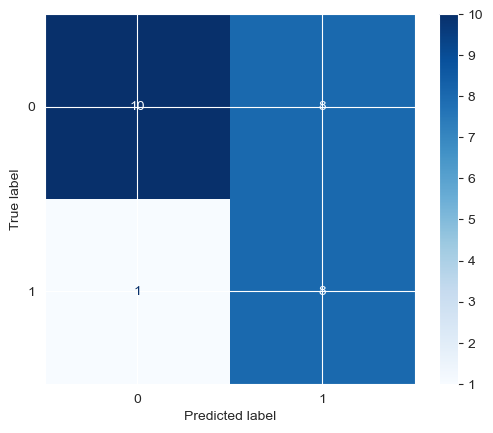

In [82]:
y_pred_nb = best_model_nb.predict(X_test)

print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

Naive Bayes classifier performs well for detecting normal instances (Class 1), achieving high recall (0.89), meaning most normal cases are identified. However, its low precision for Class 1 (0.50) indicates many false positives. For anomalies (Class 0), the model is precise (0.91) but struggles with recall (0.56), missing a significant portion of actual anomalies. The overall accuracy of 67% and F1-scores suggest the model moderately balances performance but may require improvement to better identify anomalies without sacrificing the precision for normal instances.

### Random Forest Classifier

Best for: High-dimensional data |
Pros: Robust to overfitting, handles feature importance, works well with non-linear data |
Cons: Slow to train, hard to interpret individual trees

In [83]:
rf = RandomForestClassifier(random_state=101)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15, 100],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': [None, 'balanced']
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best accuracy score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy score for Random Forest: 0.7222943722943723


In [84]:
best_model_rf = grid_search_rf.best_estimator_
test_accuracy_rf = best_model_rf.score(X_test, y_test)
print("Test set accuracy with best parameters:", test_accuracy_rf)

Test set accuracy with best parameters: 0.6296296296296297


Below, we access the important features based on the Random Forest model.

In [85]:
feature_importance_rf = pd.Series(grid_search_rf.best_estimator_.feature_importances_, index=X.columns.tolist())
print("Random Forest Feature Importance:\n", feature_importance_rf.sort_values(ascending=False))

Random Forest Feature Importance:
 Recycled H2 Gas Flow (g/h)                 0.233531
RX-203 Pressure (psig)                     0.183846
Glycerol Feed Concentration (g/L)          0.128807
Average Temp.\n(°C)                        0.127208
Liquid Feed \n(L/h)                        0.124531
Feed \npH                                  0.088994
After HEX (°C)                             0.066053
Pure H2 Gas Flow Setpoint on PLC\n(g/h)    0.047029
dtype: float64


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.47      1.00      0.64         9

    accuracy                           0.63        27
   macro avg       0.74      0.72      0.63        27
weighted avg       0.82      0.63      0.62        27



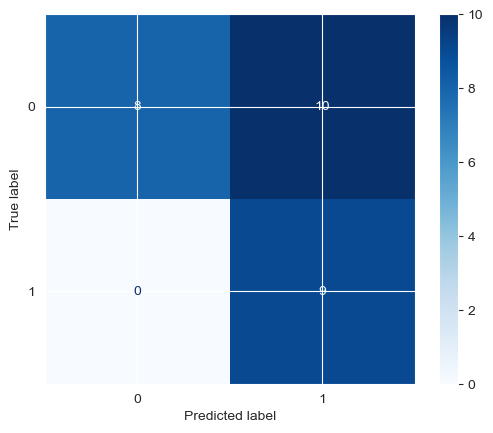

In [86]:
y_pred_rf = best_model_rf.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.show()

Random Forest classifier performs well in detecting normal instances (Class 1) with perfect recall (1.00), ensuring that no normal cases are missed. However, it struggles to identify anomalies (Class 0), achieving a recall of only 0.44, meaning more than half of actual anomalies are not detected. The overall accuracy is moderate at 63%, with F1-scores indicating imbalanced performance between the two classes. While the model's precision for anomalies is excellent (1.00), its low recall for Class 0 and low precision for Class 1 suggest it needs improvement, possibly through hyperparameter tuning or feature engineering.

### Decision Tree Classifier

Best for: Small to medium-sized datasets |
Pros: Easy to interpret, handles non-linear relationships, no need for scaling |
Cons: Prone to overfitting, sensitive to small variations in the data

In [87]:
dt = DecisionTreeClassifier(random_state=101)
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 100],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': [None, 'balanced']
}

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best accuracy score for Decision Tree:", grid_search_dt.best_score_)

Best parameters for Decision Tree: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best accuracy score for Decision Tree: 0.6987012987012988


In [88]:
best_model_dt = grid_search_dt.best_estimator_
test_accuracy_dt = best_model_dt.score(X_test, y_test)
print("Test set accuracy with best parameters:", test_accuracy_dt)

Test set accuracy with best parameters: 0.5925925925925926


Below, we access the important features based on the Decision Tree model.

In [89]:
feature_importance_dt = pd.Series(best_model_dt.feature_importances_, index=X.columns.tolist())
print("Decision Tree Feature Importance:\n", feature_importance_dt.sort_values(ascending=False))

Decision Tree Feature Importance:
 RX-203 Pressure (psig)                     0.432034
After HEX (°C)                             0.247760
Liquid Feed \n(L/h)                        0.182166
Glycerol Feed Concentration (g/L)          0.116038
Average Temp.\n(°C)                        0.022002
Pure H2 Gas Flow Setpoint on PLC\n(g/h)    0.000000
Recycled H2 Gas Flow (g/h)                 0.000000
Feed \npH                                  0.000000
dtype: float64


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.44      0.59        18
           1       0.44      0.89      0.59         9

    accuracy                           0.59        27
   macro avg       0.67      0.67      0.59        27
weighted avg       0.74      0.59      0.59        27



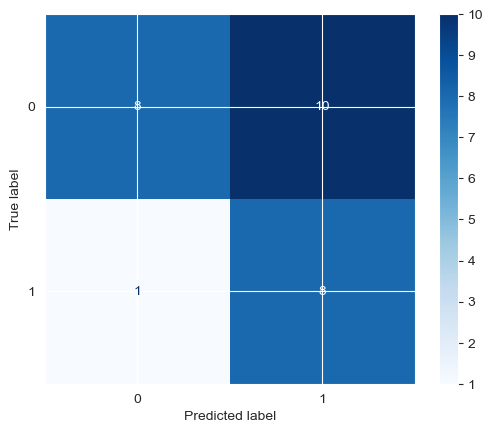

In [90]:
y_pred_dt = best_model_dt.predict(X_test)

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm)

disp_dt.plot(cmap='Blues')
plt.show()

Decision Tree classifier performs well in detecting normal instances (Class 1), with high recall (0.89), ensuring that most normal cases are identified. However, it struggles with identifying anomalies (Class 0), achieving a recall of only 0.44, meaning it misses more than half of actual anomalies. The overall accuracy of 59% and F1-scores for both classes indicate moderate performance, but the imbalance in class-specific precision and recall suggests that the model needs further improvement, such as better feature selection or hyperparameter tuning, to effectively distinguish between anomalies and normal instances.

### Feature importance - Random Forest vs Decision Tree

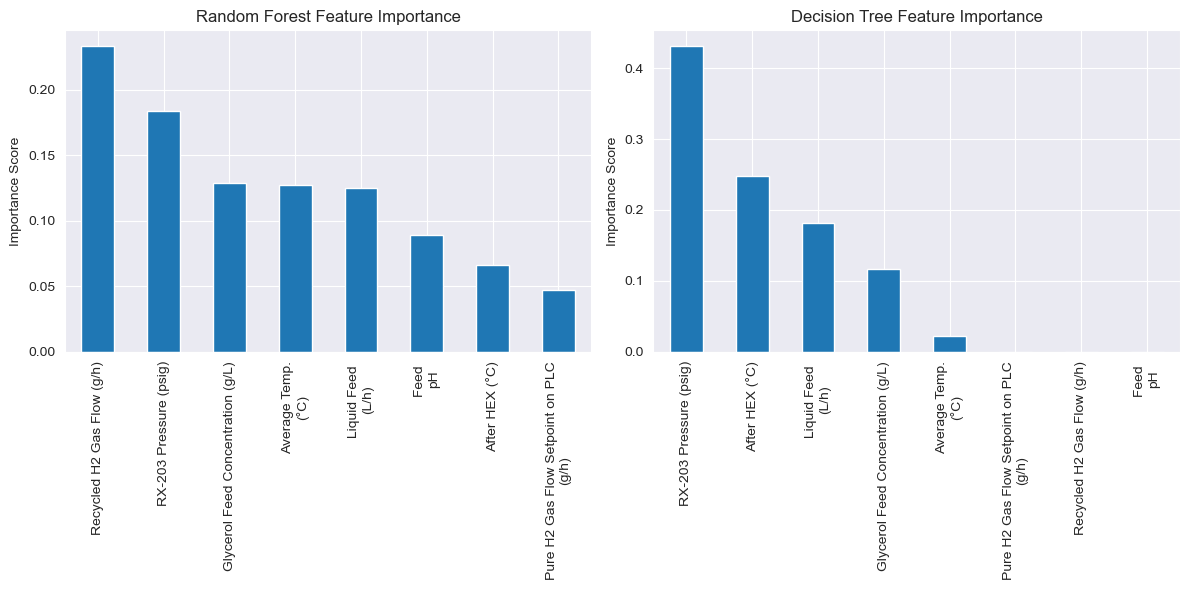

In [91]:
feature_importance_rf = pd.Series(grid_search_rf.best_estimator_.feature_importances_,
                                  index=X.columns.tolist())
feature_importance_rf = feature_importance_rf.sort_values(ascending=False)

feature_importance_dt = pd.Series(grid_search_dt.best_estimator_.feature_importances_,
                                  index=X.columns.tolist())
feature_importance_dt = feature_importance_dt.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
feature_importance_rf.plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance Score')

plt.subplot(1, 2, 2)
feature_importance_dt.plot(kind='bar')
plt.title('Decision Tree Feature Importance')
plt.ylabel('Importance Score')

plt.tight_layout()
plt.show()

* Random Forest model emphasizes a more distributed importance across features, with Recycled H2 Gas Flow being the most important, whereas the Decision Tree model heavily prioritizes RX-203 Pressure.
* After HEX (°C) is significant in the Decision Tree model but moderately important in the Random Forest model.
* Feed pH and Pure H2 Gas Flow Setpoint on PLC consistently show low importance in both models, indicating these features have minimal influence on predictions.

### Support Vector Machine

Best for: High-dimensional data and small datasets |
Pros: Effective in high-dimensional spaces, robust to outliers, works well with clear margins of separation |
Cons: Slow for large datasets, hard to tune hyperparameters

In [92]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'degree': [2, 3, 4]
}

svc = SVC()
search_svc = GridSearchCV(svc, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

search_svc.fit(X_train, y_train)

print("Best parameters found:", search_svc.best_params_)
print("Best cross-validation:", search_svc.best_score_)

Best parameters found: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation: 0.7593073593073593


In [93]:
best_model_svc = search_svc.best_estimator_
test_accuracy_svc = best_model_svc.score(X_test, y_test)
print("Test set accuracy with best parameters:", test_accuracy_svc)

Test set accuracy with best parameters: 0.5185185185185185


SVC Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.28      0.43        18
           1       0.41      1.00      0.58         9

    accuracy                           0.52        27
   macro avg       0.70      0.64      0.51        27
weighted avg       0.80      0.52      0.48        27



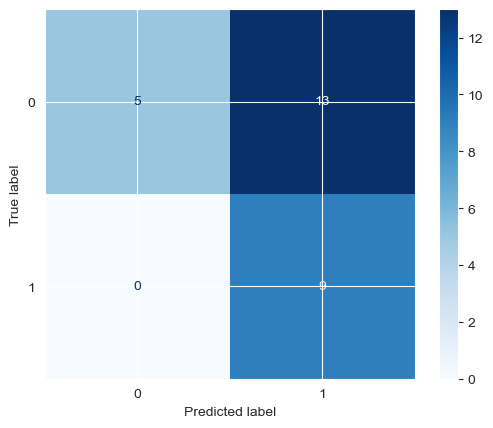

In [94]:
y_pred_svc = best_model_svc.predict(X_test)

print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))

cm = confusion_matrix(y_test, y_pred_svc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

SVM classifier performs well in detecting normal instances (Class 1), achieving perfect recall (1.00), meaning it identifies all normal cases. However, it performs poorly in detecting anomalies (Class 0), with a very low recall of 0.28, missing the majority of anomalies. The overall accuracy is low (52%), and the F1-scores indicate imbalanced and poor performance across both classes. This suggests that the model is highly biased towards Class 1 and struggles to handle anomalies effectively.

### XGBoost

Best for: Complex, large datasets |
Pros: High accuracy, handles missing data, efficient with regularization |
Cons: Computationally intensive, sensitive to hyperparameter tuning

In [95]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=101)

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best accuracy score for XGBoost:", grid_search_xgb.best_score_)

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best accuracy score for XGBoost: 0.7543290043290044


In [96]:
best_model_xgb = grid_search_xgb.best_estimator_
test_accuracy_xgb = best_model_xgb.score(X_test, y_test)
print("Test set accuracy with best parameters:", test_accuracy_xgb)

Test set accuracy with best parameters: 0.6296296296296297


XGB Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.47      1.00      0.64         9

    accuracy                           0.63        27
   macro avg       0.74      0.72      0.63        27
weighted avg       0.82      0.63      0.62        27



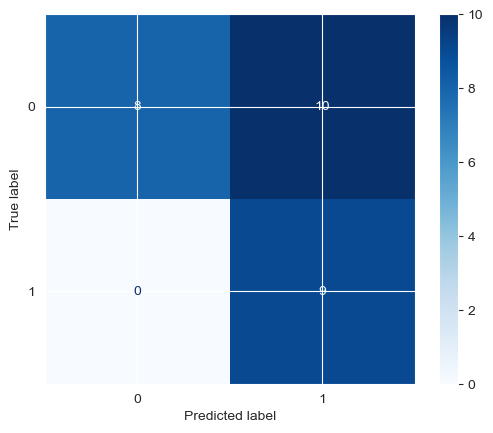

In [97]:
y_pred_xgb = best_model_xgb.predict(X_test)

print("XGB Classification Report:\n", classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

XGB classifier performs well in detecting normal instances (Class 1), achieving perfect recall (1.00), meaning it identifies all normal cases. However, it performs poorly in detecting anomalies (Class 0), with a recall of only 0.44, meaning more than half of actual anomalies are not detected. The overall accuracy of 63% and F1-scores for both classes indicate moderate performance. While the model is highly precise for anomalies, it struggles with recall and has low precision for normal instances.

### Multi-Layer Perceptron (MLP)

Best for: Non-linear and complex relationships |
Pros: Captures non-linear interactions, works well with large datasets, highly flexible |
Cons: Computationally expensive, requires careful tuning, less interpretable

In [98]:
mlp = MLPClassifier(random_state=101)

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [100, 200, 500, 1000],
}

grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)

print("Best parameters found:", grid_search_mlp.best_params_)
print("Best accuracy score for MLP:", grid_search_mlp.best_score_)

Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Best accuracy score for MLP: 0.7681818181818182


In [99]:
best_model_mlp = grid_search_mlp.best_estimator_

test_accuracy_mlp = best_model_mlp.score(X_test, y_test)
print("Test set accuracy with best parameters:", test_accuracy_mlp)

Test set accuracy with best parameters: 0.48148148148148145


MLP Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.33      0.46        18
           1       0.37      0.78      0.50         9

    accuracy                           0.48        27
   macro avg       0.56      0.56      0.48        27
weighted avg       0.62      0.48      0.47        27



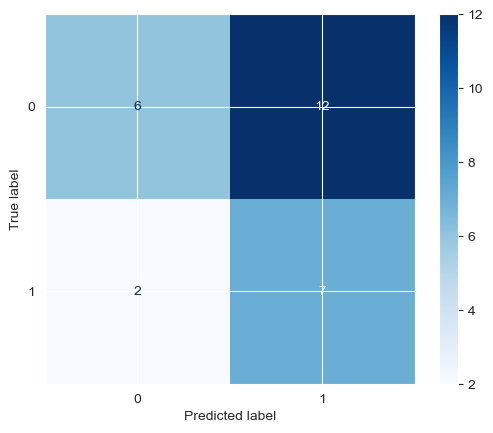

In [100]:
y_pred_mlp = best_model_mlp.predict(X_test)

print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

cm = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

MLP classifier performs poorly overall, with an accuracy of only 48%. It struggles to detect anomalies (Class 0), achieving a low recall of 0.33, meaning most anomalies are not identified. While it performs better in detecting normal instances (Class 1) with a recall of 0.78, its low precision for Class 1 (0.37) indicates many false positives. Both classes exhibit imbalanced performance, with neither achieving satisfactory results.

### Stacked Classifier

Best for: Combining strengths of multiple models |
Pros: Highly accurate, leverages diverse model strengths, robust to overfitting |
Cons: Computationally expensive, harder to interpret, requires careful design of base and meta-models

In [101]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report

base_models = [
    ('rf', best_model_rf),
    ('nb', best_model_nb),
    ('xgb', best_model_xgb)
]

meta_model = best_model_log_reg

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)

stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Accuracy: {stacking_accuracy}")

Stacking Accuracy: 0.6296296296296297


In [102]:
print("Stacking Classification Report:")
print(classification_report(y_test, y_pred_stacking))

Stacking Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.47      1.00      0.64         9

    accuracy                           0.63        27
   macro avg       0.74      0.72      0.63        27
weighted avg       0.82      0.63      0.62        27



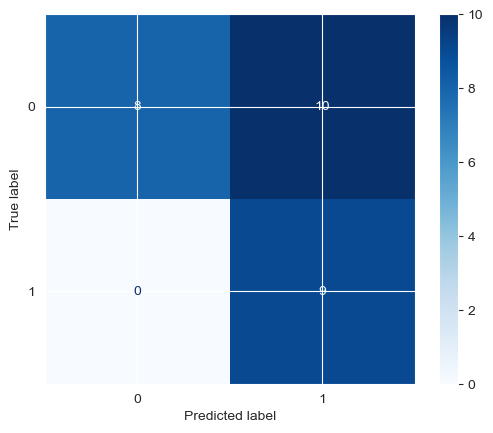

In [103]:
cm = confusion_matrix(y_test, y_pred_stacking)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

Stacking model performs well for normal instances (Class 1), achieving perfect recall (1.00), ensuring all normal cases are identified. However, it struggles to detect anomalies (Class 0), with a low recall of 0.44, meaning most anomalies are not identified. The high precision for anomalies (1.00) indicates that when the model predicts anomalies, it is always correct, but its low recall limits overall effectiveness. The overall accuracy (63%) and F1-scores suggest moderate performance, but the imbalance in class-specific metrics highlights areas for improvement

## MULTIPLE MODEL COMPARISONS

### Accuracy

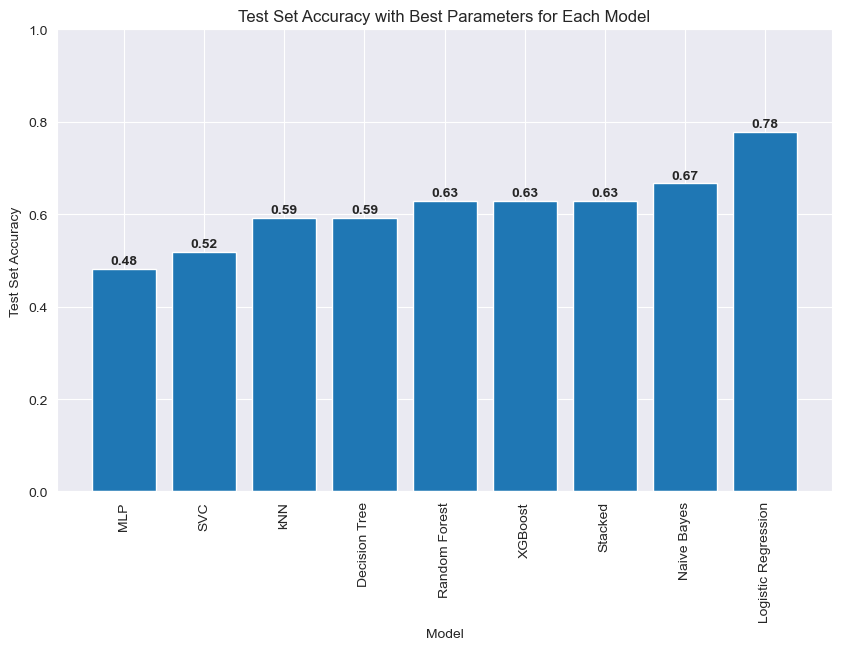

In [104]:
test_accuracies = {
    "Logistic Regression": test_accuracy_log_reg,
    "kNN": test_accuracy_knn,
    "Naive Bayes": test_accuracy_nb,
    "Random Forest": test_accuracy_rf,
    "Decision Tree": test_accuracy_dt,
    "SVC": test_accuracy_svc,
    "XGBoost": test_accuracy_xgb,
    "MLP": test_accuracy_mlp,
    "Stacked": stacking_accuracy,
}
test_accuracies = dict(sorted(test_accuracies.items(), key=lambda item: item[1]))

plt.figure(figsize=(10, 6))
plt.bar(test_accuracies.keys(), test_accuracies.values())

plt.title('Test Set Accuracy with Best Parameters for Each Model')
plt.xlabel('Model')
plt.ylabel('Test Set Accuracy')

for model, accuracy in test_accuracies.items():
    plt.text(model, accuracy + 0.01, f"{accuracy:.2f}", ha='center', fontweight='bold')

plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.show()

* Logistic Regression outperforms all other models with an accuracy of 78%, suggesting it is the most suitable for this task.
* Models like Naive Bayes, Random Forest, XGBoost, and Stacked Model show moderate performance (63%-67%) and could be considered alternatives with further improvements.
* SVC and MLP perform the worst, indicating these models are less suitable for the current dataset and problem setup. Further feature engineering, tuning, or alternative approaches might be needed to improve their performance.

### ROC Curve

In [105]:
def plot_roc_curve(models, X_test, y_test):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
    axes = axes.ravel()

    for i, (model_name, model) in enumerate(models.items()):
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            raise ValueError(f"Model {model_name} doesn't support probability or decision scores.")

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        axes[i].plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        axes[i].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        axes[i].set_xlim([0.0, 1.0])
        axes[i].set_ylim([0.0, 1.05])
        axes[i].set_title(f'{model_name} ROC Curve')
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive Rate')
        axes[i].legend(loc='lower right')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

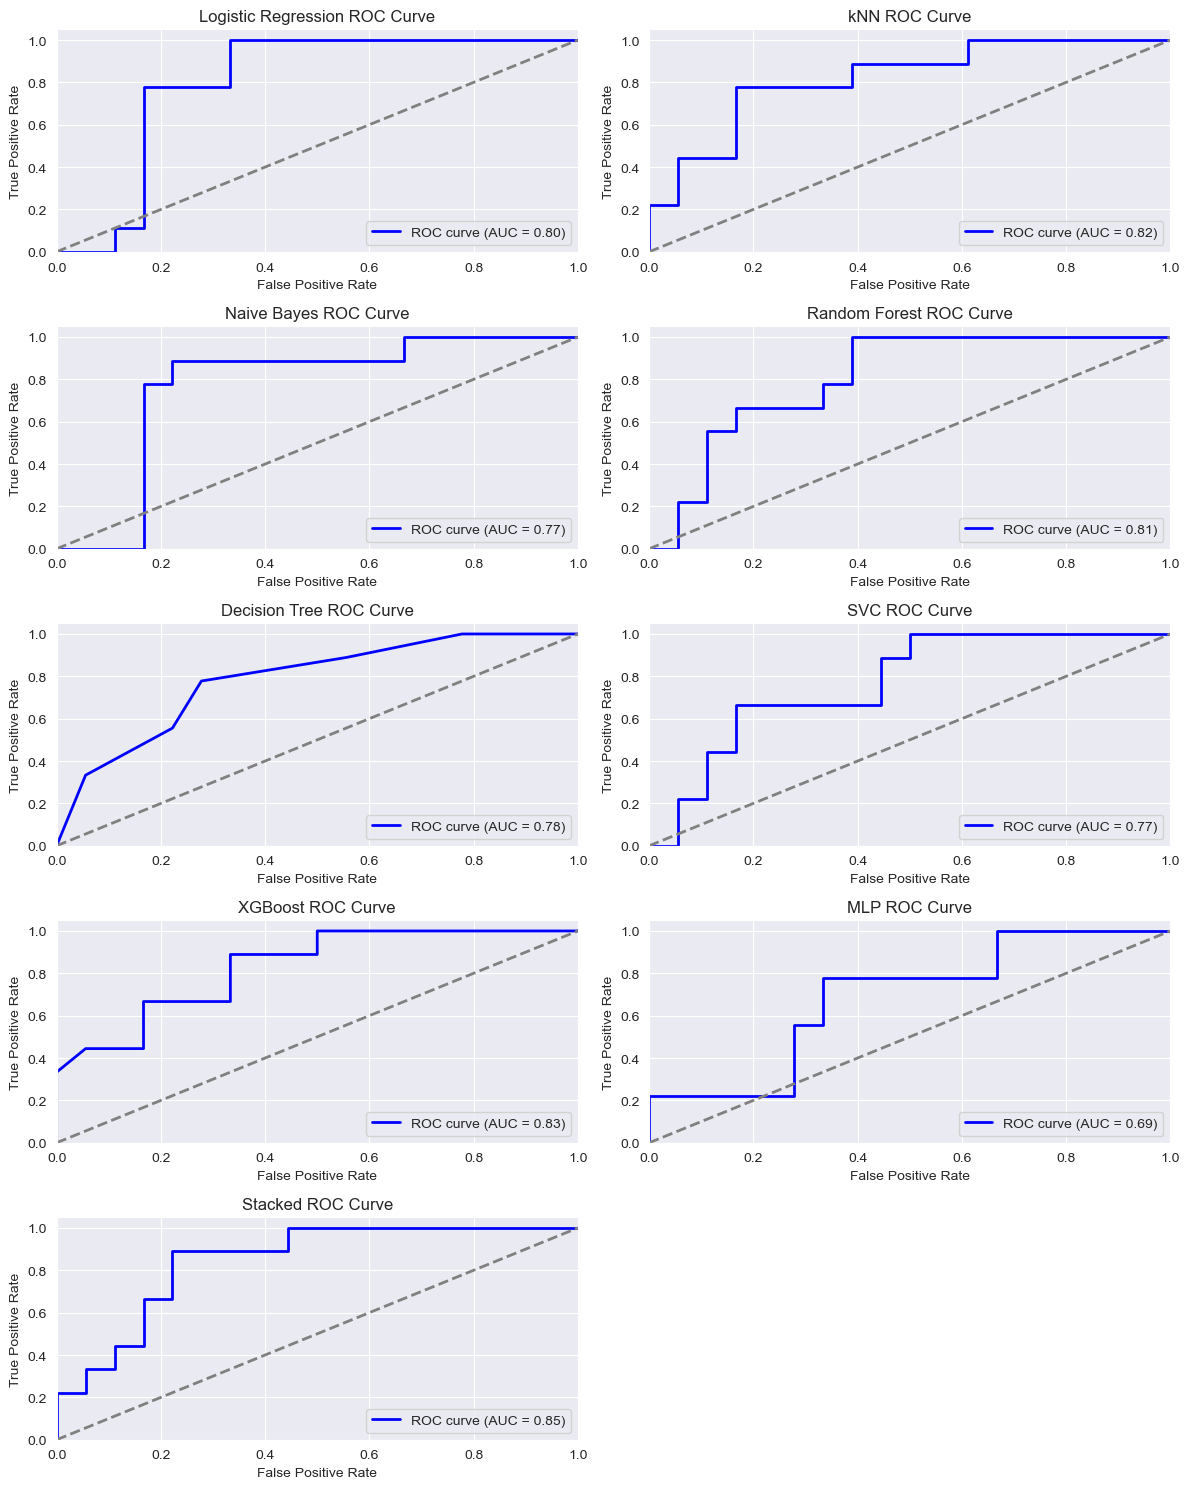

In [106]:
roc_models = {
    "Logistic Regression": best_model_log_reg,
    "kNN": best_model_knn,
    "Naive Bayes": best_model_nb,
    "Random Forest": best_model_rf,
    "Decision Tree": best_model_dt,
    "SVC": best_model_svc,
    "XGBoost": best_model_xgb,
    "MLP": best_model_mlp,
    "Stacked": stacking_model,
}

plot_roc_curve(roc_models, X_test, y_test)

Stacked Model outperforms other models with the highest AUC (0.85), followed by XGBoost (0.83) and kNN (0.82). These models demonstrate strong discriminatory power for anomaly detection. Models like MLP perform poorly, indicating potential issues with hyperparameter tuning or suitability for the dataset. The chart provides a clear indication of which models are more effective for this classification task, with Stacked, XGBoost, and kNN emerging as the top-performing options.

### Precision

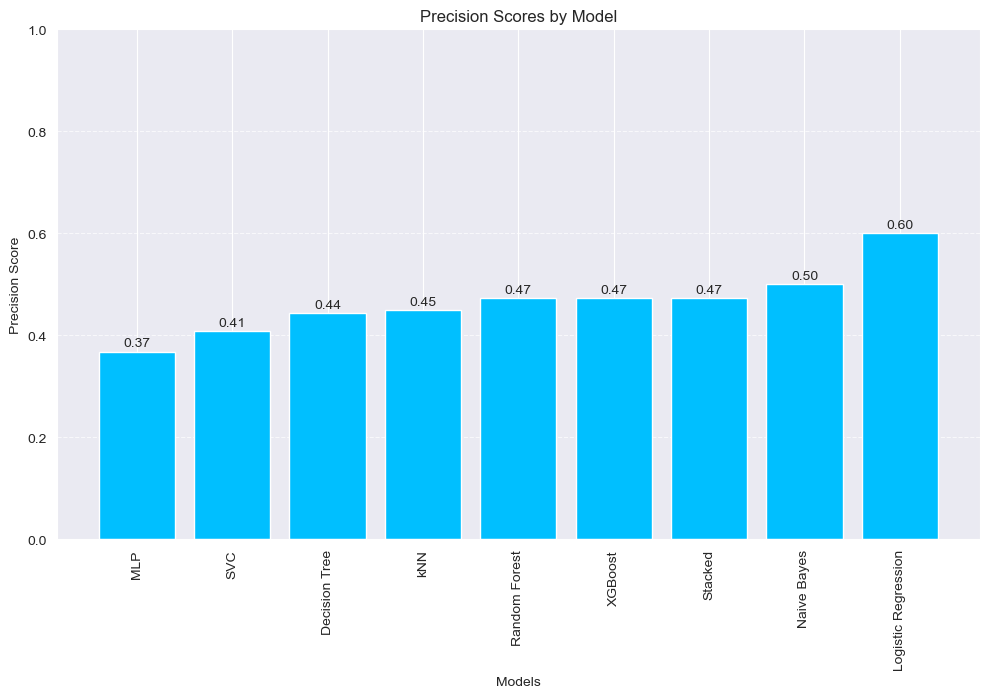

In [107]:
model_predictions = {
    "Logistic Regression": y_pred_log_reg,
    "kNN": y_pred_knn,
    "Naive Bayes": y_pred_nb,
    "Random Forest": y_pred_rf,
    "Decision Tree": y_pred_dt,
    "SVC": y_pred_svc,
    "XGBoost": y_pred_xgb,
    "MLP": y_pred_mlp,
    "Stacked": y_pred_stacking,
}

precision_scores = {
    model_name: precision_score(y_test, y_pred, average='binary') for model_name, y_pred in model_predictions.items()
}
precision_scores = dict(sorted(precision_scores.items(), key=lambda item: item[1]))

plt.figure(figsize=(10, 6))
model_names = list(precision_scores.keys())
precision_values = list(precision_scores.values())

bars = plt.bar(model_names, precision_values, color='deepskyblue')
plt.title("Precision Scores by Model")
plt.xlabel("Models")
plt.ylabel("Precision Score")
plt.ylim(0, 1)

for bar, value in zip(bars, precision_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{value:.2f}", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

* Logistic Regression is the most effective at reducing false positives, achieving the highest precision (0.60), making it suitable for scenarios where precision is critical.
* Naive Bayes, Random Forest, XGBoost, and Stacked Model provide decent precision (~0.47-0.50), offering moderate reliability.
* Models like MLP, SVC, and Decision Tree perform poorly in terms of precision, which may limit their effectiveness for tasks requiring high precision.

### Recall

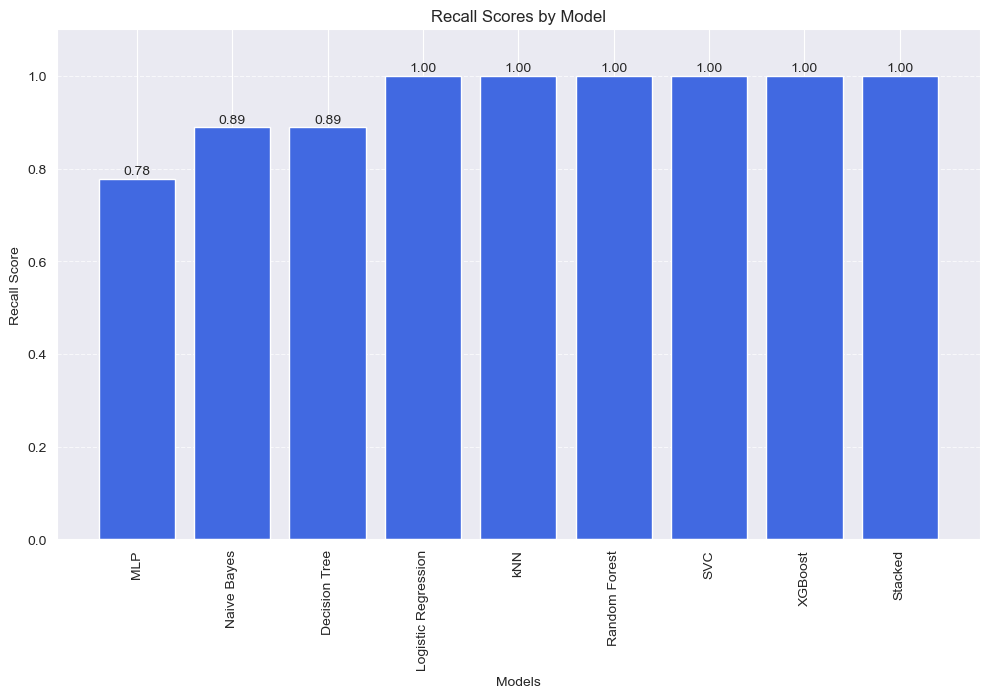

In [108]:
recall_scores = {
    model_name: recall_score(y_test, y_pred, average='binary') for model_name, y_pred in model_predictions.items()
}
recall_scores = dict(sorted(recall_scores.items(), key=lambda item: item[1]))

plt.figure(figsize=(10, 6))
model_names = list(recall_scores.keys())
recall_values = list(recall_scores.values())

bars = plt.bar(model_names, recall_values, color='royalblue')
plt.title("Recall Scores by Model")
plt.xlabel("Models")
plt.ylabel("Recall Score")
plt.ylim(0, 1)

for bar, value in zip(bars, recall_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{value:.2f}", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0, 1.1)
plt.xticks(rotation=90)
plt.show()

* Models like Logistic Regression, kNN, Random Forest, Decision Tree, SVC, XGBoost, and Stacked Model demonstrate exceptional recall performance, achieving perfect scores. This makes them highly suitable for tasks where identifying all normal cases (Class 1) is crucial.
* Naive Bayes performs well but slightly lags behind the top-performing models.
* MLP exhibits the weakest recall performance

### F1 Score

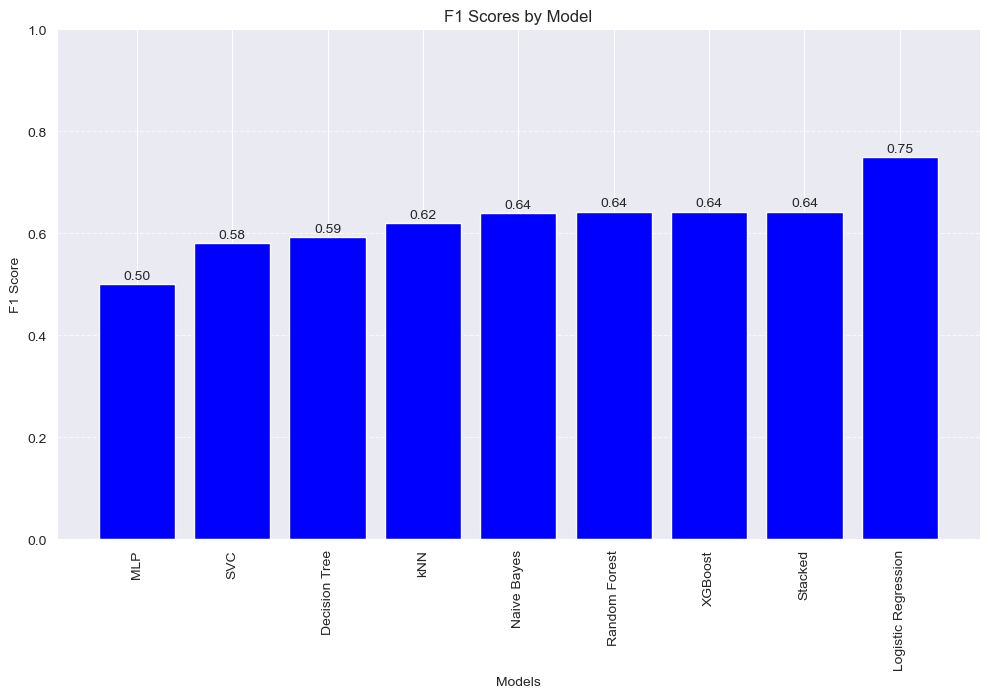

In [109]:
f1_scores = {
    model_name: f1_score(y_test, y_pred, average='binary') for model_name, y_pred in model_predictions.items()
}
f1_scores = dict(sorted(f1_scores.items(), key=lambda item: item[1]))

plt.figure(figsize=(10, 6))
model_names = list(f1_scores.keys())
f1_values = list(f1_scores.values())

bars = plt.bar(model_names, f1_values, color='blue')
plt.title("F1 Scores by Model")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.ylim(0, 1)

for bar, value in zip(bars, f1_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{value:.2f}", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

* Logistic Regression is the most effective model overall, as its F1 score reflects a robust trade-off between precision and recall.
* Naive Bayes, Random Forest, XGBoost, and Stacked Model are reliable alternatives with comparable F1 scores.
* Models like MLP, Decision Tree, and SVC perform less effectively, indicating room for improvement through optimization or alternative approaches.

### Confusion Matrix

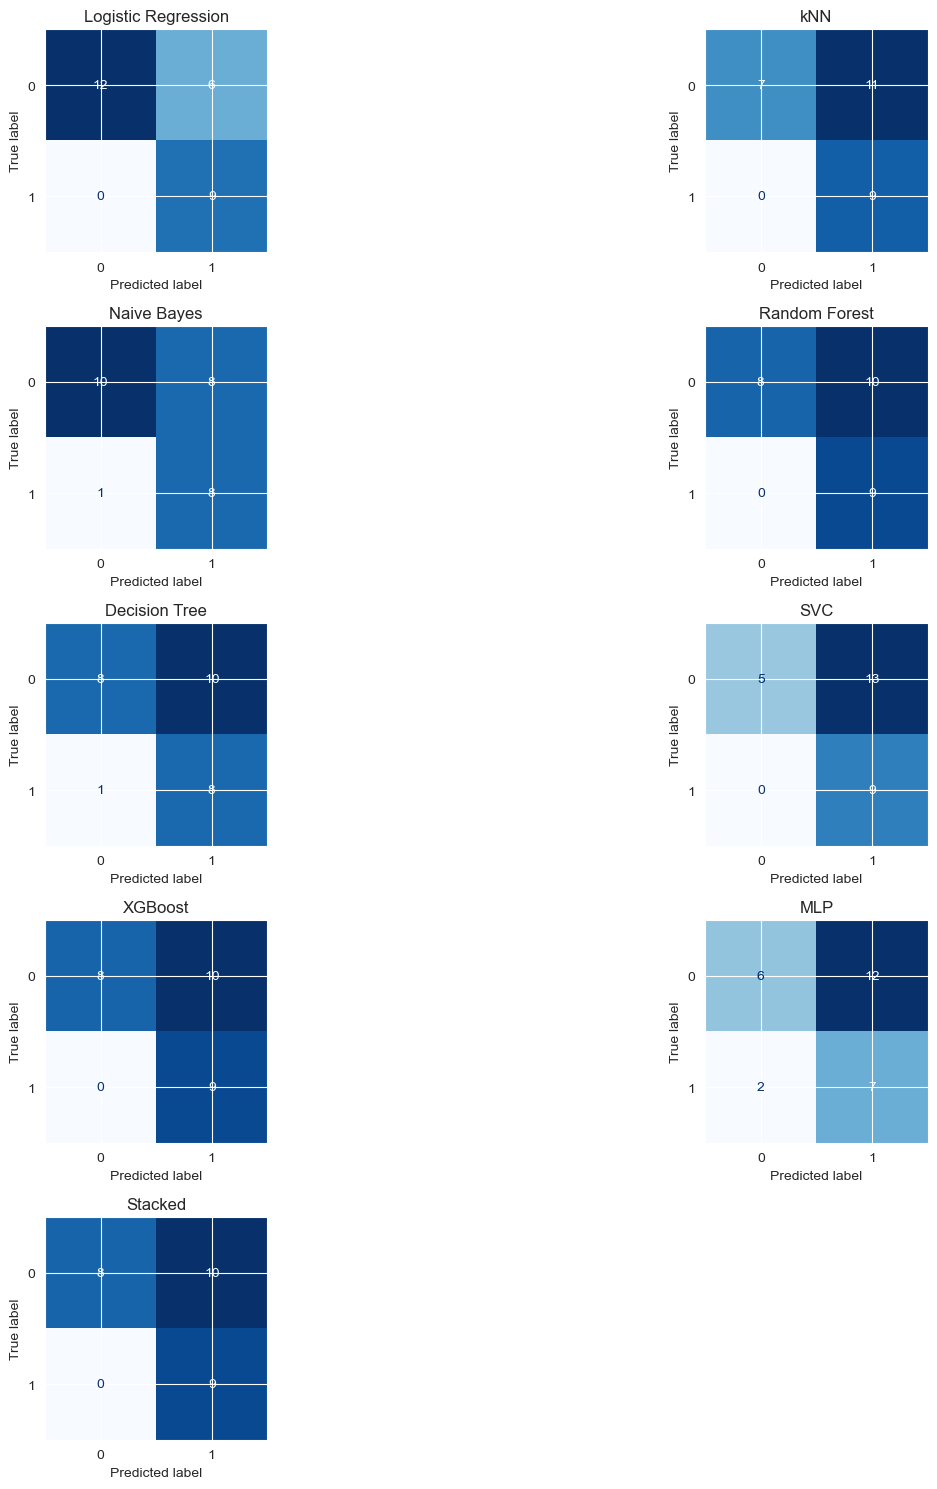

In [110]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

axes = axes.ravel()
for i, (model_name, y_pred) in enumerate(model_predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(model_name)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## CONCLUSION

Based on the analysis of multiple classification metrics, Logistic Regression emerges as the best-performing model for anomaly detection in this context. It consistently achieves the highest scores across metrics, including F1 score (0.75), precision (0.60), and recall (1.00), indicating its strong ability to balance between correctly identifying both normal and anomalous cases while minimizing false positives and false negatives.

Models such as Naive Bayes, Random Forest, XGBoost, and Stacked Model also exhibit competitive performance with F1 scores of 0.64 and high recall, making them viable alternatives.

However, models like MLP, Decision Tree, and SVC show lower F1 scores and less balanced performance, suggesting they are less suited for this task without further optimization.